In [30]:
import pandas as pd 
H=pd.read_csv("housing.csv")
HOUSING=H.copy()

In [54]:
print("*********************************************************")
print("            INITIAL DATA OVERVIEW")
print("*********************************************************")
HOUSING.info()
print("*************************************************************************************************************************************************")
HOUSING.describe()
HOUSING

*********************************************************
            INITIAL DATA OVERVIEW
********************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 3691 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3691 non-null   datetime64[ns]
 1   price           3691 non-null   int32         
 2   bedrooms        3691 non-null   int64         
 3   bathrooms       3691 non-null   int32         
 4   sqft_living     3691 non-null   float64       
 5   sqft_lot        3691 non-null   float64       
 6   floors          3691 non-null   int32         
 7   waterfront      3691 non-null   int64         
 8   view            3691 non-null   int64         
 9   condition       3691 non-null   int64         
 10  sqft_above      3691 non-null   int64         
 11  sqft_basement   3691 non-null   int64         
 12  yr_built        

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,house_age,renovated_age,price_per_sqft,total_sqft,bath_bed_ratio
0,2014-02-05,313000,3,1,1340.0,7683.5,1,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,70.0,20,233.582090,1340.0,0.333333
2,2014-02-05,342000,3,2,1930.0,7683.5,1,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59.0,0,177.202073,1930.0,0.666667
3,2014-02-05,420000,3,2,2000.0,7683.5,1,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,62.0,0,210.000000,3000.0,0.666667
4,2014-02-05,550000,4,2,1940.0,7683.5,1,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,49.0,33,283.505155,2740.0,0.500000
5,2014-02-05,490000,2,1,880.0,7683.5,1,0,0,3,...,1994,522 NE 88th St,Seattle,WA 98115,USA,87.0,31,556.818182,880.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-09-07,308166,3,1,1510.0,6360.0,1,0,0,4,...,1979,501 N 143rd St,Seattle,WA 98133,USA,49.0,46,204.083444,1510.0,0.333333
4596,2014-09-07,534333,3,2,1460.0,7573.0,2,0,0,3,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,49.0,16,365.981507,1460.0,0.666667
4597,2014-09-07,416904,3,2,3010.0,7014.0,2,0,0,3,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,49.0,0,138.506312,3010.0,0.666667
4598,2014-10-07,203400,4,2,2090.0,6630.0,1,0,0,3,...,0,5148 S Creston St,Seattle,WA 98178,USA,49.0,0,97.320574,3110.0,0.500000


In [32]:
HOUSING.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [33]:
m=["sqft_living","sqft_lot",'yr_built']
for i in m:
    HOUSING[i] = HOUSING[i].fillna(HOUSING[i].median())
HOUSING["city"]=HOUSING["city"].fillna(HOUSING["city"].mode()[0])

HOUSING.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [34]:
HOUSING.shape


(4600, 18)

In [35]:
HOUSING.size

82800

In [36]:
HOUSING['date'] = pd.to_datetime(HOUSING['date'],errors='coerce')
HOUSING['date'] = HOUSING['date'].ffill()
HOUSING[['bathrooms','floors','price']]=HOUSING[['bathrooms','floors','price']].astype(int)

In [37]:
HOUSING.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-02-05,313000,3,1,1340.0,7683.5,1,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-02-05,2384000,5,2,3650.0,7683.5,2,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-02-05,342000,3,2,1930.0,7683.5,1,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-02-05,420000,3,2,2000.0,7683.5,1,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-02-05,550000,4,2,1940.0,7683.5,1,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-09-07,308166,3,1,1510.0,6360.0,1,0,0,4,1510,0,1976.0,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-09-07,534333,3,2,1460.0,7573.0,2,0,0,3,1460,0,1976.0,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-09-07,416904,3,2,3010.0,7014.0,2,0,0,3,3010,0,1976.0,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-10-07,203400,4,2,2090.0,6630.0,1,0,0,3,1070,1020,1976.0,0,5148 S Creston St,Seattle,WA 98178,USA


In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
print('************************************************************************************')
print('                               CLEAND DATA OVERVIWE                                 ')
print('************************************************************************************')

************************************************************************************
                               CLEAND DATA OVERVIWE                                 
************************************************************************************


In [40]:
print('*******************************************************************************')
print('                               SUMMARY STATISTICS                              ')
print('*******************************************************************************')
print(HOUSING[['price', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms']].describe().astype(int))

*******************************************************************************
                               SUMMARY STATISTICS                              
*******************************************************************************
          price  sqft_living  sqft_lot  bedrooms  bathrooms
count      4600         4600      4600      4600       4600
mean     553948         2137     14837         3          1
std      580837          960     35867         0          0
min           0          370       638         0          0
25%      322500         1470      5001         3          1
50%      461000         1980      7683         3          2
75%      655000         2610     11000         4          2
max    26590000        13540   1074218         9          8


*************************************************************************************
                                UNIVARIATE ANALYSIS                                 
*************************************************************************************


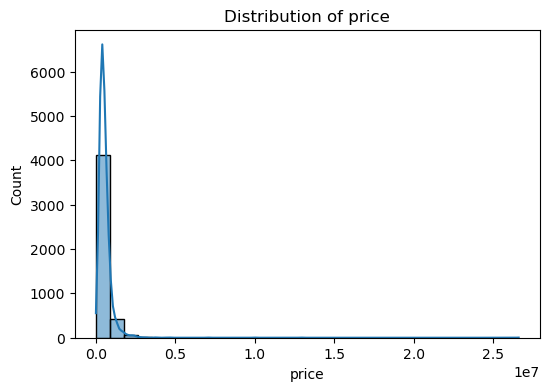

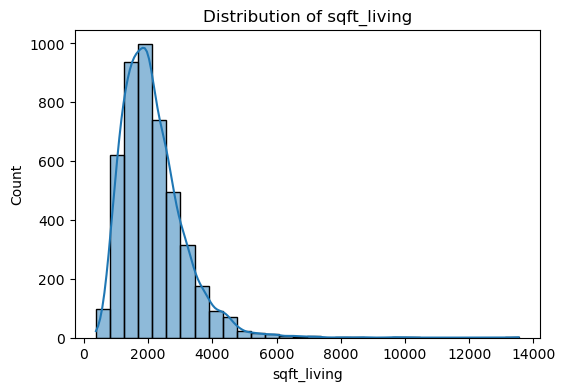

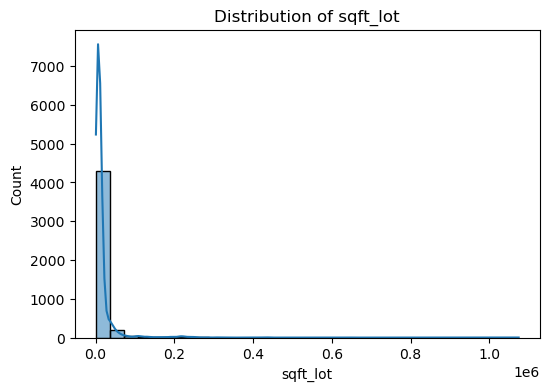

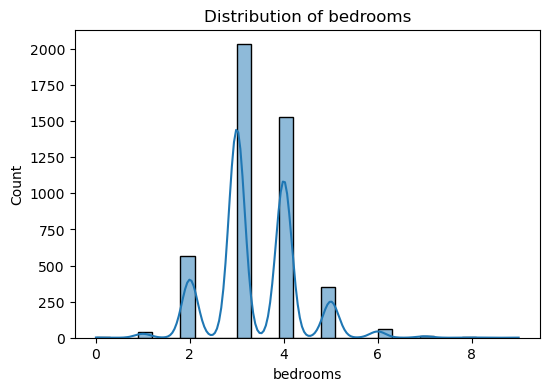

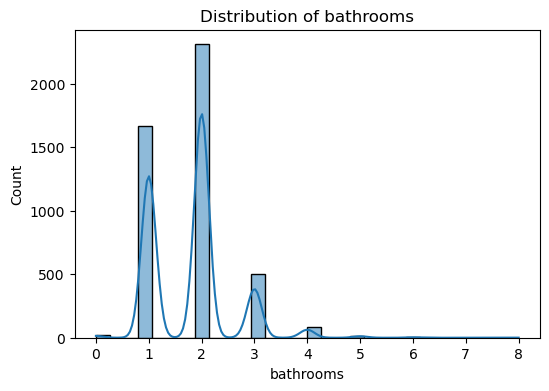

In [41]:
print('*************************************************************************************')
print('                                UNIVARIATE ANALYSIS                                 ')
print('*************************************************************************************')
import seaborn as sns
import matplotlib.pyplot as plt
c = ['price', 'sqft_living','sqft_lot','bedrooms', 'bathrooms']
for i in c:
    plt.figure(figsize=(6, 4))
    sns.histplot(HOUSING[i], kde=True, bins=30)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()



*****************************************************************************
                                 BIVARIATE ANALYSIS
******************************************************************************


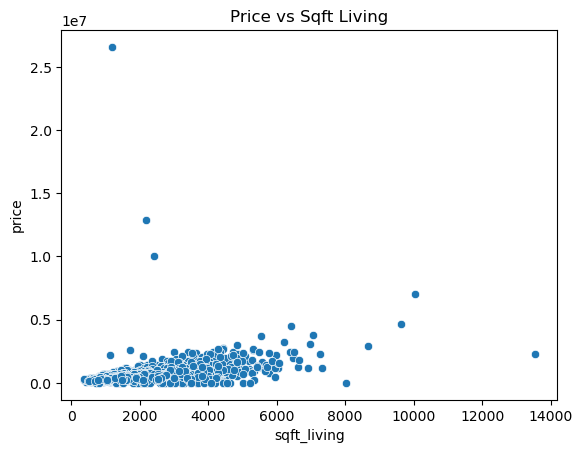

In [42]:
print("*****************************************************************************")
print("                                 BIVARIATE ANALYSIS") 
print("******************************************************************************")

sns.scatterplot(data=HOUSING, x='sqft_living', y='price')
plt.title('Price vs Sqft Living')
plt.show()

*************************************************************************************
                                    BIVARIATE ANALYSIS
*************************************************************************************


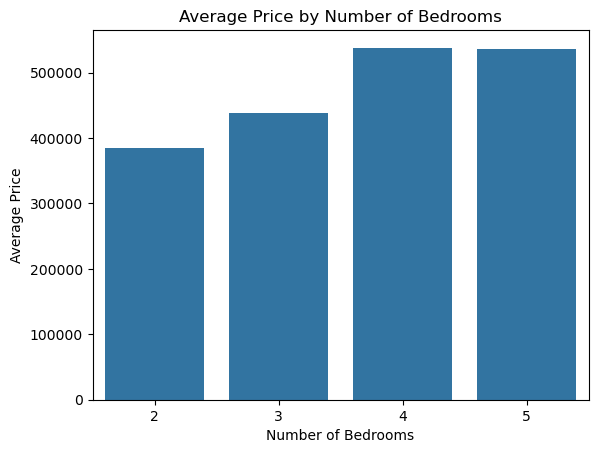

In [58]:
print("*************************************************************************************")
print("                                    BIVARIATE ANALYSIS") 
print("*************************************************************************************")
avg_price = HOUSING.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(x='bedrooms', y='price', data=avg_price)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

************************************************************************************************************************************************
                                                             Multivaraiate Analysis      
************************************************************************************************************************************************


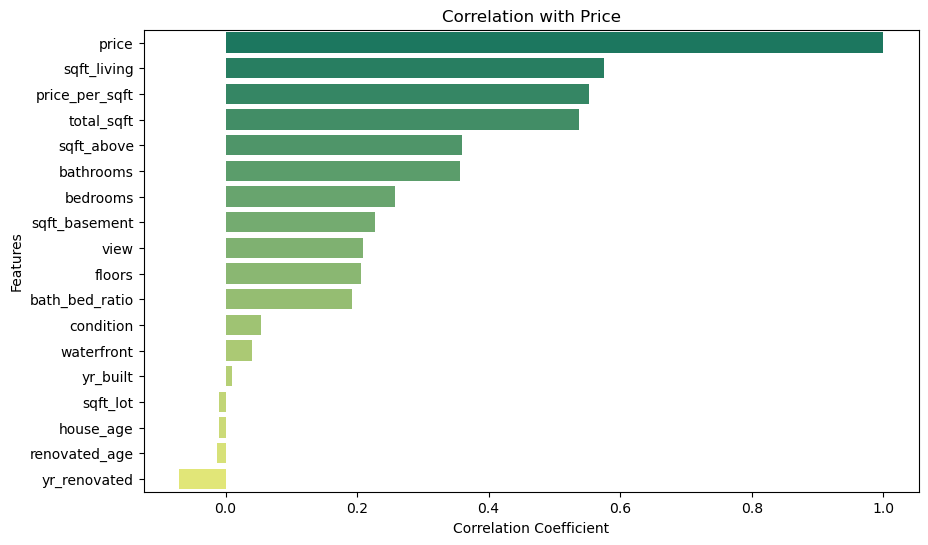

In [61]:

print("************************************************************************************************************************************************")
print("                                                             Multivaraiate Analysis      ") 
print("************************************************************************************************************************************************")
plt.figure(figsize=(10, 6))
correlations = HOUSING.corr(numeric_only=True)['price'].sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index, palette="summer")
plt.title("Correlation with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

************************************************************************************************************************************************
                                                     Multivaraiate Analysis      
************************************************************************************************************************************************


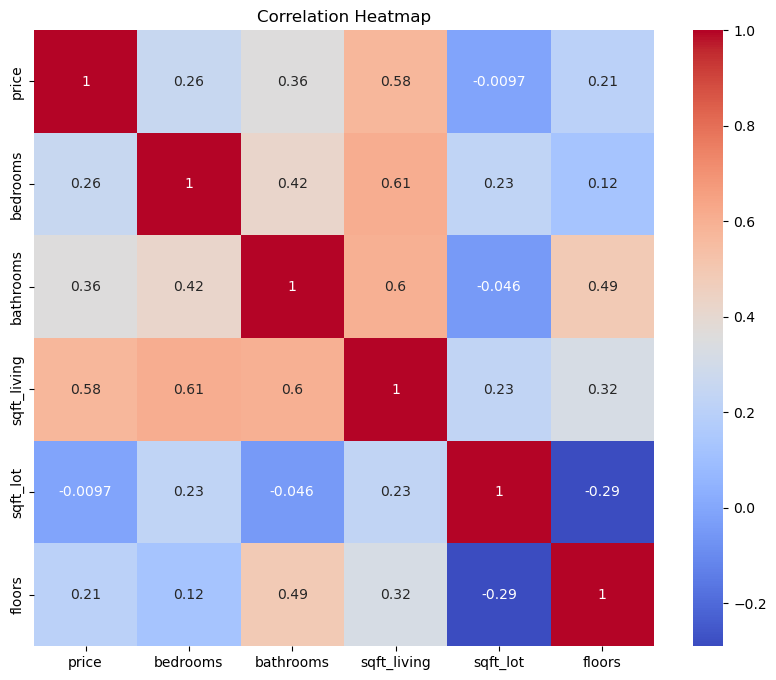

In [62]:

print("************************************************************************************************************************************************")
print("                                                     Multivaraiate Analysis      ") 
print("************************************************************************************************************************************************")
plt.figure(figsize=(10, 8))
sns.heatmap(HOUSING[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [63]:

print("************************************************************************************************************************************************")
print("                                                     Outlier      ") 
print("************************************************************************************************************************************************")

************************************************************************************************************************************************
                                                     Outlier      
************************************************************************************************************************************************


In [65]:

def remove_outliers_iqr(HOUSING, column):
    Q1 = HOUSING[column].quantile(0.25)
    Q3 = HOUSING[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return HOUSING[(HOUSING[column] >= lower_bound) & (HOUSING[column] <= upper_bound)]
s=["price","bedrooms","bathrooms","sqft_living","sqft_lot"]
for i in s:
    HOUSING = remove_outliers_iqr(HOUSING, i)

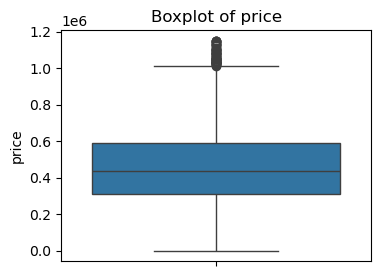

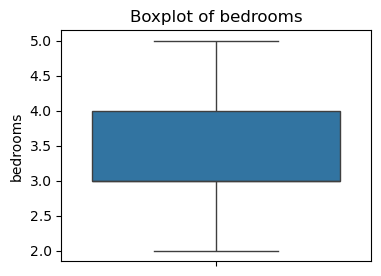

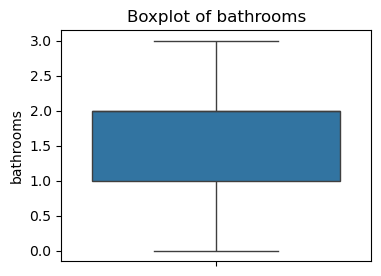

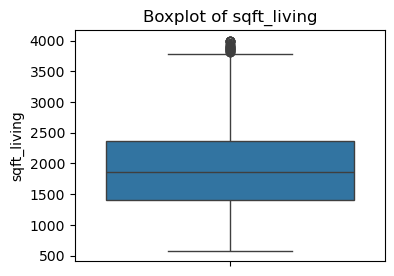

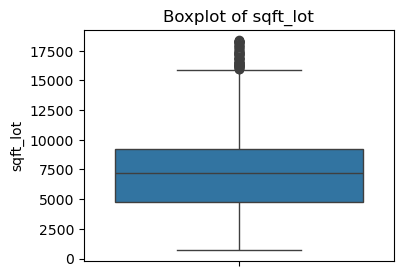

In [47]:
for i in s:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=HOUSING[i])
    plt.title(f'Boxplot of {i}')
    plt.ylabel(f'{i}')
    plt.show()

************************************************************************************************************************************************
                                                           Visualization      
************************************************************************************************************************************************


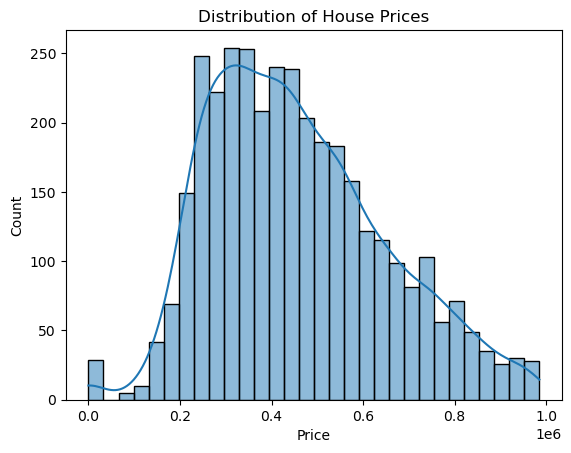

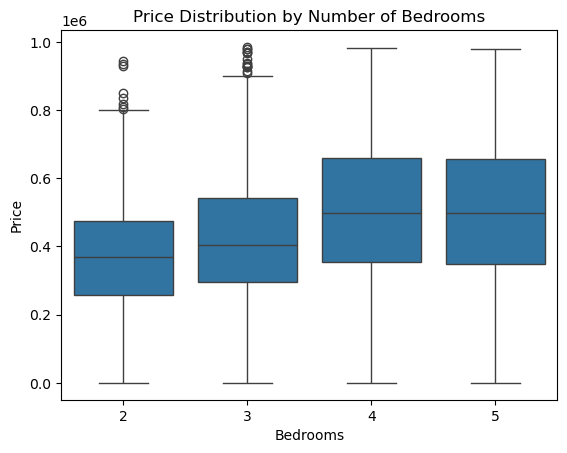

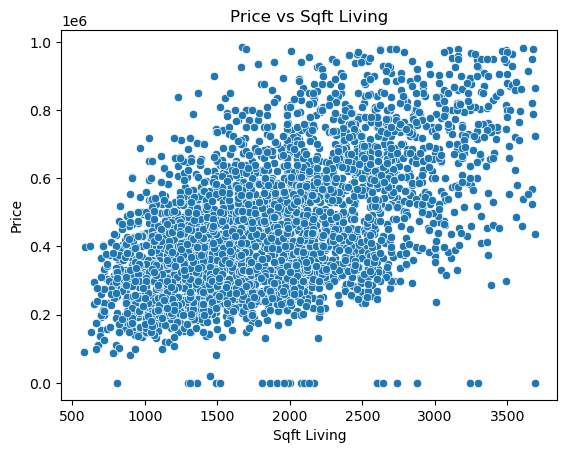

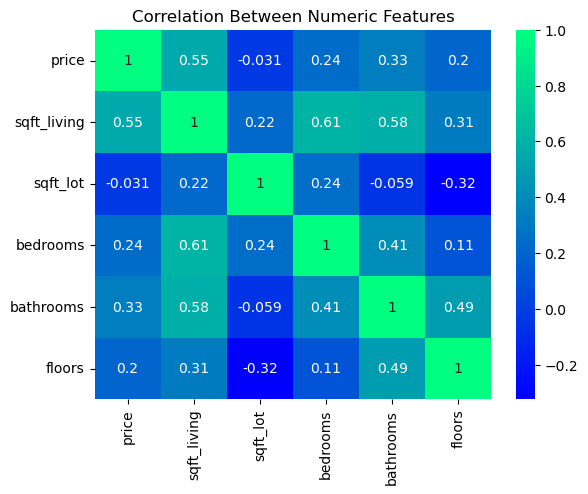

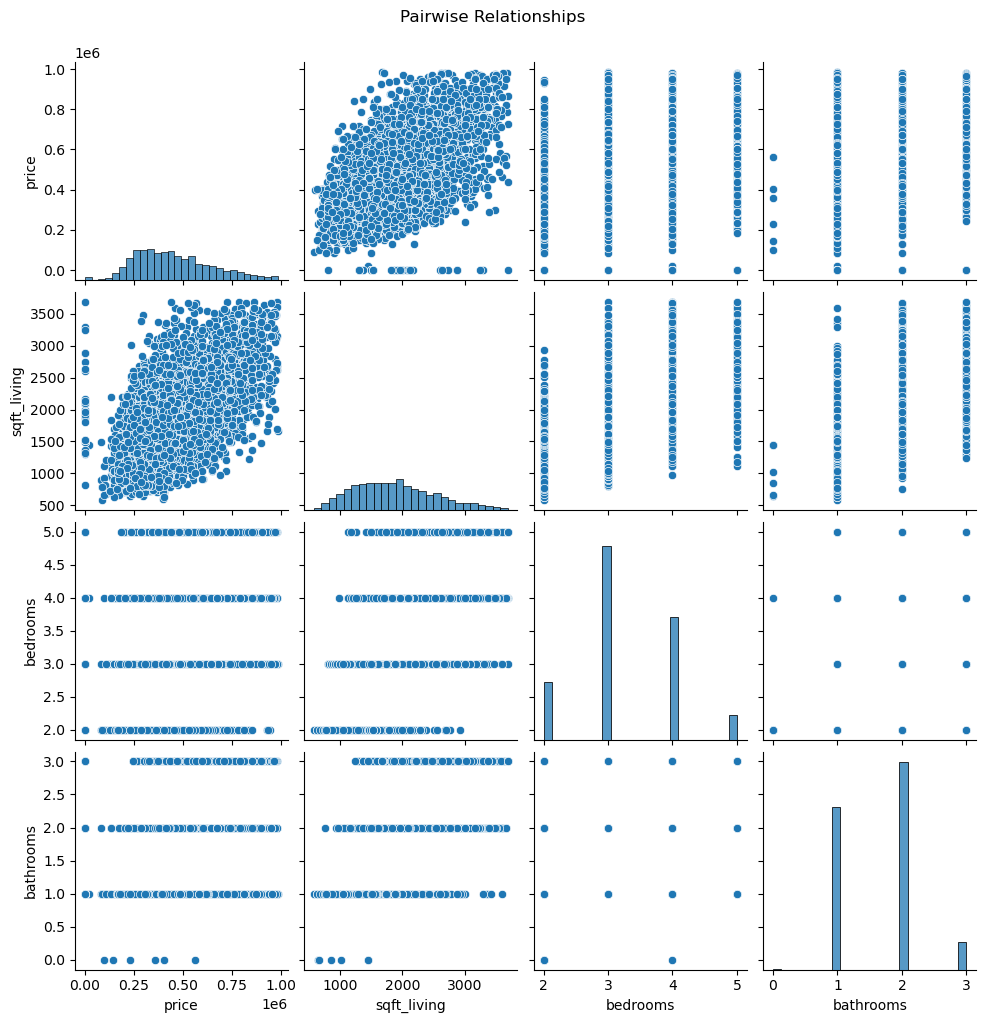

In [67]:
print("************************************************************************************************************************************************")
print("                                                           Visualization      ") 
print("************************************************************************************************************************************************")
sns.histplot(HOUSING['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()
sns.boxplot(x='bedrooms', y='price', data=HOUSING)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.scatterplot(data=HOUSING, x='sqft_living', y='price')
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()
import numpy as np

corr = HOUSING[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors']].corr()
sns.heatmap(corr, annot=True, cmap="winter")
plt.title('Correlation Between Numeric Features')
plt.show()
sns.pairplot(HOUSING[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [ ]:
monthe vis

************************************************************************************************************************************************
                                                      PRICE TRENDS OVER TIME                                           
************************************************************************************************************************************************


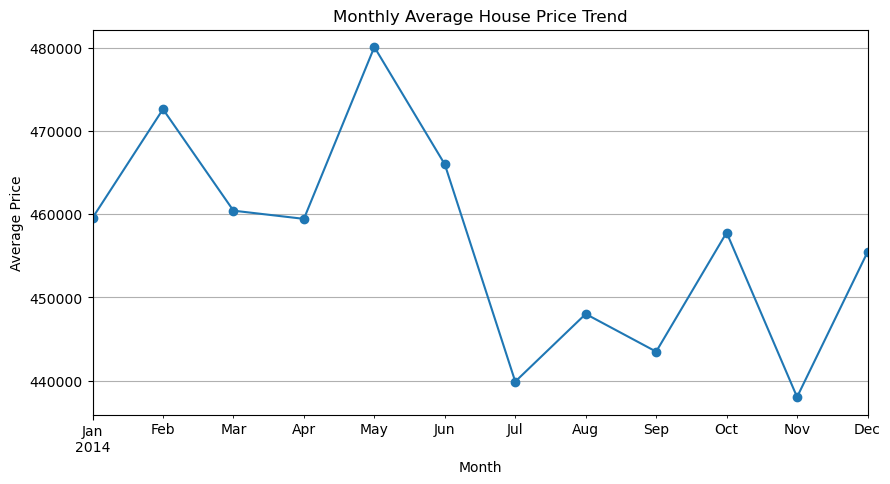

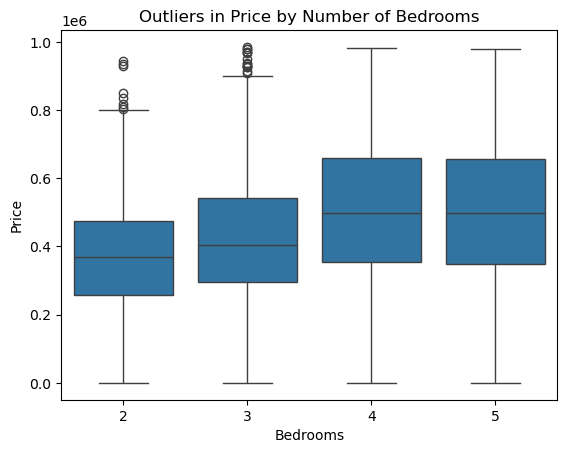

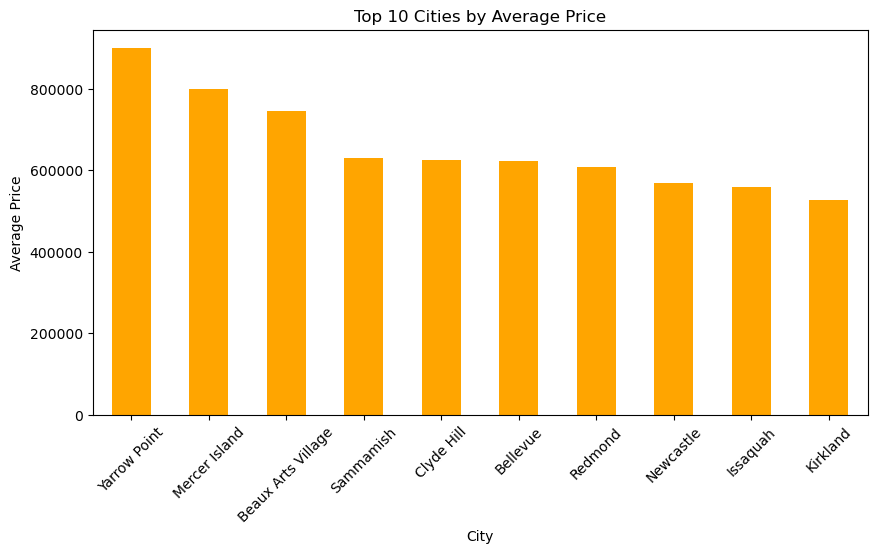

In [69]:
print('************************************************************************************************************************************************')
print('                                                      PRICE TRENDS OVER TIME                                           ')
print('************************************************************************************************************************************************')
monthly_avg = HOUSING.groupby(HOUSING['date'].dt.to_period('M'))['price'].mean()
monthly_avg.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('Monthly Average House Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()
sns.boxplot(data=HOUSING, x='bedrooms', y='price')
plt.title('Outliers in Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
avg_price_city = HOUSING.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

avg_price_city.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Cities by Average Price')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Feature Engineering

In [70]:
print('************************************************************************************************************************************************')
print('                                                          Feature Engineering                                       ')
print('************************************************************************************************************************************************')

HOUSING['house_age'] = 2025 - HOUSING['yr_built']
HOUSING['renovated_age'] = HOUSING['yr_renovated'].apply(lambda x: 2025 - x if x > 0 else 0)
HOUSING['price_per_sqft'] = HOUSING['price'] / HOUSING['sqft_living']
HOUSING['total_sqft'] = HOUSING['sqft_living'] + HOUSING['sqft_basement']
HOUSING['bath_bed_ratio'] = HOUSING['bathrooms'] / HOUSING['bedrooms'].replace(0, 1)
HOUSING.dropna(inplace=True)

HOUSING.head()

************************************************************************************************************************************************
                                                          Feature Engineering                                       
************************************************************************************************************************************************


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,house_age,renovated_age,price_per_sqft,total_sqft,bath_bed_ratio
0,2014-02-05,313000,3,1,1340.0,7683.5,1,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,70.0,20,233.582090,1340.0,0.333333
2,2014-02-05,342000,3,2,1930.0,7683.5,1,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59.0,0,177.202073,1930.0,0.666667
3,2014-02-05,420000,3,2,2000.0,7683.5,1,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,62.0,0,210.000000,3000.0,0.666667
4,2014-02-05,550000,4,2,1940.0,7683.5,1,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,49.0,33,283.505155,2740.0,0.500000
5,2014-02-05,490000,2,1,880.0,7683.5,1,0,0,3,...,1994,522 NE 88th St,Seattle,WA 98115,USA,87.0,31,556.818182,880.0,0.500000


In [72]:

print('************************************************************************************************************************************************')
print('                                                                HYPOTHESIS TESTING                                      ')
print('************************************************************************************************************************************************')


************************************************************************************************************************************************
                                                                HYPOTHESIS TESTING                                      
************************************************************************************************************************************************


In [74]:
from scipy import stats


# 1. T-test: Waterfront vs Non-Waterfront Prices

price_waterfront = HOUSING[HOUSING['waterfront'] == 1]['price']
price_non_waterfront = HOUSING[HOUSING['waterfront'] == 0]['price']

t_stat, p_val_ttest = stats.ttest_ind(price_waterfront, price_non_waterfront, equal_var=False)
print("T-test: Waterfront vs Non-Waterfront")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val_ttest:.5f}\n")


# 2. ANOVA: Price across Bedroom Counts

grouped_prices = [group['price'].values for name, group in HOUSING.groupby('bedrooms')]
f_stat, p_val_anova = stats.f_oneway(*grouped_prices)

print("ANOVA: Price by Number of Bedrooms")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val_anova:.5e}\n")


T-test: Waterfront vs Non-Waterfront
T-statistic = 1.650, p-value = 0.34670

ANOVA: Price by Number of Bedrooms
F-statistic = 81.146, p-value = 9.40400e-51



In [73]:
print("************************************************************************************************************************************************")
print('                                                        Univariate Analysis Insights')
print("************************************************************************************************************************************************")

************************************************************************************************************************************************
                                                        Univariate Analysis Insights
************************************************************************************************************************************************


In [ ]:

1. Price Distribution
The distribution of house prices is right-skewed.

Most houses are priced between $200,000 and $600,000, with a sharp drop beyond that range.

A few high-priced houses act as outliers.

2. Bedrooms
The majority of homes have 3 bedrooms, followed by 4 bedrooms.

Very few homes have 2 or 5 bedrooms.

The distribution shows that the dataset is focused on standard residential properties.

3. Bathrooms
Most homes have 1.0 or 2.0 bathrooms, forming clear peaks in the distribution.

The distribution is multi-modal, showing several common configurations (e.g., 1, 1.5, 2 bathrooms).

4. sqft_living
The distribution of sqft_living is right-skewed, indicating most homes are below 2500 sq. ft..

Very large homes (above 3000 sq. ft.) are relatively rare.

The bulk of homes fall between 1000 and 2500 sq. ft.

5. sqft_lot
sqft_lot has a long tail, with most properties under 10,000 sq. ft., but a few going much higher.

This suggests that while most homes are built on small to medium plots, there are a few large estates included.



In [77]:
print("***************************************************************************************************************************************************")
print("                                                          Bivariate Analysis Insights")
print("*************************************************************************************************************************************************")

***************************************************************************************************************************************************
                                                          Bivariate Analysis Insights
*************************************************************************************************************************************************


In [ ]:

1. Price vs. Sqft_Living (Scatter Plot)
There's a clear positive correlation between sqft_living and price.

As the living area increases, the house price tends to increase.

However, the spread becomes wider at higher square footages, indicating more price variation for larger homes.

This supports the statistical finding: Pearson correlation = 0.419 (moderate positive).

2. Average Price by Number of Bedrooms (Bar Plot)
Average price generally increases with the number of bedrooms from 1 to 8.

Interestingly, houses with 0 bedrooms show an unusually high average price — possibly due to non-residential properties or studio-style premium listings.

Beyond 8 bedrooms, the average price drops, which may reflect properties that are less desirable or located in non-premium areas.

This supports your ANOVA test, which confirmed that bedroom count significantly affects price, but the relationship is not strictly linear.



In [78]:
print("*************************************************************************************************************************************************")
print("                                                       Multivariate Analysis Insights")
print("**************************************************************************************************************************************************")

*************************************************************************************************************************************************
                                                       Multivariate Analysis Insights
**************************************************************************************************************************************************


In [ ]:
1. Correlation Heatmap
This chart shows pairwise correlation between key numerical features:

Strongest correlation with price:

sqft_living (0.58): Indicates a strong positive linear relationship with house price.

bathrooms (0.36) and bedrooms (0.26) also show moderate correlation with price.

sqft_lot has almost no correlation with price (−0.0097).

floors and price correlation is weak (0.21), suggesting minimal influence.

High correlation between sqft_living, bedrooms, and bathrooms shows that larger homes tend to have more rooms and bathrooms.

2. Bar Plot – Correlation of Features with Price
This chart ranks variables based on their correlation with price.

Top 3 positive influencers on price:

sqft_living

sqft_above

bathrooms

Features like yr_renovated, sqft_lot, and even waterfront have very low correlation, suggesting limited linear impact.

Interestingly, view, condition, and floors show some effect, but not strong enough to predict price independently.

In [79]:
print("*************************************************************************************************************************************************")
print("                                                  Data Visualization Insights")
print("**************************************************************************************************************************************************")

*************************************************************************************************************************************************
                                                  Data Visualization Insights
**************************************************************************************************************************************************


In [ ]:

1. Distribution of House Prices
House prices are right-skewed, with the highest concentration between $200,000 and $600,000.

Few properties are priced above $1 million, indicating luxury home outliers.

2. Price Distribution by Number of Bedrooms (Boxplot)
Median price increases slightly from 2 to 5 bedrooms.

However, the spread (IQR) also increases, meaning greater price variability in homes with more bedrooms.

Several outliers are present in every category, suggesting price is influenced by more than just bedroom count.

3. Price vs Sqft_Living (Scatter Plot)
Clear positive linear trend: Larger homes (in sqft) generally command higher prices.

This aligns with earlier correlation and regression findings (r ≈ 0.58).

4. Correlation Heatmap
sqft_living, bathrooms, and bedrooms show moderate to strong positive correlation with price.

sqft_lot shows almost no correlation, implying lot size has little direct impact on price in this dataset.

sqft_living also strongly correlates with bedrooms and bathrooms, indicating feature overlap.

5. Pair Plot (Multivariate View)
The pair plot confirms visual linear relationships between price, sqft_living, and bathrooms.

Discrete variables like bedrooms form vertical clusters, showing they are not strongly continuous predictors.

The scatter plots in the diagonal display non-normality in price and room counts.

In [82]:
print("***************************************************************************************************************************************************")
print("                                              Insights: Price Trends & Regional Analysis")
print("*************************************************************************************************************************************************")

***************************************************************************************************************************************************
                                              Insights: Price Trends & Regional Analysis
*************************************************************************************************************************************************


In [ ]:

1. Monthly Average House Price Trend (Line Plot)
In 2014, average house prices declined steadily from January to July, hitting the lowest point in mid-year.

A slight recovery is seen between August and December, but prices remained below January’s peak.

This indicates seasonal trends or market corrections, with early-year pricing being higher.

2. Outliers in Price by Number of Bedrooms (Boxplot)
All bedroom categories (2–5) have significant outliers on the higher end, indicating premium properties priced much above the median.

The spread is wide for 3- and 4-bedroom homes, showing that homes in this range cater to diverse market segments (standard vs luxury).

Despite more bedrooms, the median price doesn’t increase sharply, reinforcing that other features (like location and size) are stronger price drivers.

3. Top 10 Cities by Average Price (Bar Chart)
Mercer Island, Clyde Hill, and Beaux Arts Village top the list, with average prices above $750,000.

These cities are likely premium or waterfront zones with high property demand.

Even the 10th-ranked city (Snoqualmie Pass) has a significantly higher average than the overall dataset mean, showing clear geographic price clustering.

